In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.options.display.float_format = '{:,.4f}'.format

In [3]:
#Carregando todas as base
ambulatorial = pd.read_excel(r'E:\Documentos\bases\indice_conectar\ambulatorial\indicador_ambulatorial.xlsx', dtype={'COD': str})
cobertura = pd.read_excel(r'E:\Documentos\bases\indice_conectar\cobertura\indicador_cobertura.xlsx',dtype={'COD': str} )
hospitalar = pd.read_excel(r'E:\Documentos\bases\indice_conectar\hospitalar\indicador_hospitalar.xlsx', dtype={'COD':str})
populacao = pd.read_excel(r'E:\Documentos\bases\indice_conectar\população\população_base.xlsx', dtype={'COD':str})
receita = pd.read_excel(r'E:\Documentos\bases\indice_conectar\receita\indicador_receita.xlsx', dtype={'COD':str})

In [4]:
#Fazendo as integrações das bases
aux_1 = pd.merge(populacao[['UF', 'COD. UF', 'COD. MUNIC', 'COD', 'COD 6', 'NOME DO MUNICÍPIO', 'pop_2020']], 
                 ambulatorial[['COD', 'razão_amb-pop', 'indicadorPA']], how='left', on='COD')

In [5]:
aux_2 = pd.merge(aux_1, cobertura[['COD', 'cobertura_2020', 'indicadorCS']], how='left', on='COD')

In [6]:
hospitalar.columns

Index(['UF', 'COD. UF', 'COD', 'COD 6', 'NOME DO MUNICÍPIO', 'razão_hosp-pop',
       'razão-inv_hosp-pop', 'indicadorHOSP'],
      dtype='object')

In [7]:
aux_3 = pd.merge(aux_2, hospitalar[['COD', 'razão_hosp-pop', 'razão-inv_hosp-pop', 'indicadorHOSP']],how='left', on='COD')

In [8]:
aux_4 = pd.merge(aux_3, receita[['COD', 'rc-pc_media', 'RCpcm', 'indicadorRC']] )

In [9]:
indicador = pd.read_excel(r'E:\Documentos\bases\indice_conectar\indicador_conectar.xlsx', dtype={'COD': str})

In [10]:
aux_5 = pd.merge(aux_4, indicador[['COD', 'Índice_Conectar', 'grupo']], how='left', on='COD')

In [11]:
aux_5

,UF,COD. UF,COD. MUNIC,COD,COD 6,NOME DO MUNICÍPIO,pop_2020,razão_amb-pop,indicadorPA,cobertura_2020,indicadorCS,razão_hosp-pop,razão-inv_hosp-pop,indicadorHOSP,rc-pc_media,RCpcm,indicadorRC,Índice_Conectar,grupo
0,RO,11,23,1100023,110002,Ariquemes,109523,10.3329,0.2456,"7,204.0000",0.0658,0.1327,0.8673,0.8014,"2,480.0411","2,480.0411",0.3052,0.3228,3.0000
1,RO,11,106,1100106,110010,Guajará-Mirim,46556,7.2184,0.2773,"2,047.0000",0.0440,0.0818,0.9182,0.8810,"2,088.3622","2,088.3622",0.2344,0.2997,2.0000
2,RO,11,122,1100122,110012,Ji-Paraná,130009,37.3922,0.1323,"14,461.0000",0.1112,0.1656,0.8344,0.7475,"2,137.6184","2,137.6184",0.2440,0.2762,2.0000
3,RO,11,205,1100205,110020,Porto Velho,539354,10.1650,0.2471,"85,084.0000",0.1578,0.0252,0.9748,0.9644,"2,760.4720","2,760.4720",0.3493,0.3879,4.0000
4,RO,11,940,1100940,110094,Cujubim,26183,15.4765,0.2100,167.0000,0.0064,0.0316,0.9684,0.9552,"2,052.5224","2,052.5224",0.2273,0.2897,2.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2132,GO,52,20058,5220058,522005,São João da Paraúna,1345,11.7974,0.2340,50.0000,0.0372,0.0697,0.9303,0.8992,"11,901.6302","11,901.6302",0.9510,0.6529,9.0000
2133,GO,52,20108,5220108,522010,São Luís de Montes Belos,34157,23.9803,0.1714,"3,241.0000",0.0949,0.0804,0.9196,0.8831,"2,698.2923","2,698.2923",0.3400,0.3472,3.0000
2134,GO,52,20157,5220157,522015,São Luiz do Norte,5215,29.3729,0.1536,62.0000,0.0119,0.0697,0.9303,0.8992,"4,730.1341","4,730.1341",0.5711,0.4458,5.0000
2135,GO,52,21403,5221403,522140,Trindade,129823,7.2774,0.2765,"14,797.0000",0.1140,0.0675,0.9325,0.9025,"1,885.2978","1,885.2978",0.1923,0.2958,2.0000


In [12]:
aux_5.columns

Index(['UF', 'COD. UF', 'COD. MUNIC', 'COD', 'COD 6', 'NOME DO MUNICÍPIO',
       'pop_2020', 'razão_amb-pop', 'indicadorPA', 'cobertura_2020',
       'indicadorCS', 'razão_hosp-pop', 'razão-inv_hosp-pop', 'indicadorHOSP',
       'rc-pc_media', 'RCpcm', 'indicadorRC', 'Índice_Conectar', 'grupo'],
      dtype='object')

In [13]:
correlação = aux_5[['indicadorPA', 'indicadorCS', 'indicadorHOSP', 'indicadorRC', 'Índice_Conectar']].corr()

In [14]:
correlação['Índice_Conectar']

indicadorPA       -0.0737
indicadorCS        0.4499
indicadorHOSP      0.0228
indicadorRC        0.9457
Índice_Conectar    1.0000
Name: Índice_Conectar, dtype: float64

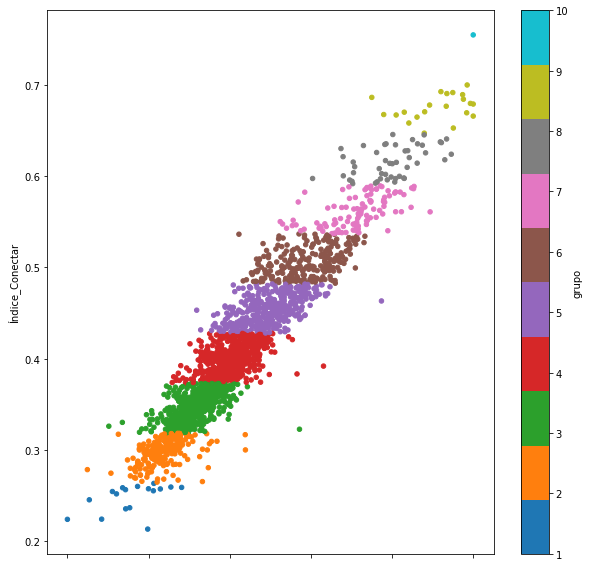

In [31]:
aux_5.plot.scatter('indicadorRC', 'Índice_Conectar', c='grupo', colormap='tab10', figsize=(10, 10));

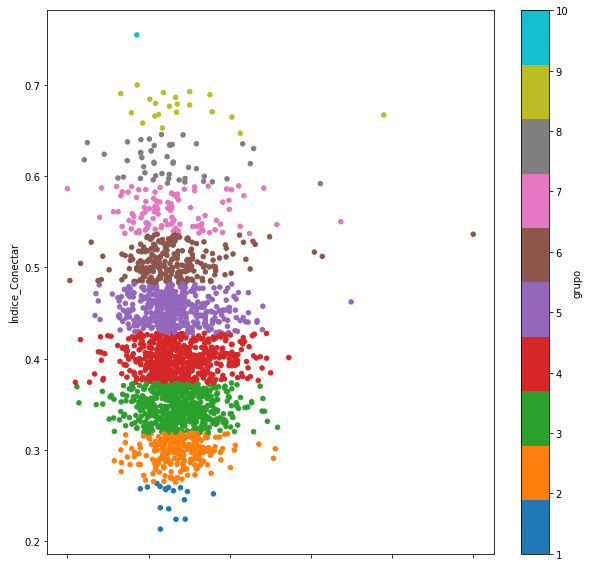

In [26]:
aux_5.plot.scatter('indicadorPA', 'Índice_Conectar', c='grupo', colormap='tab10', figsize=(10, 10));

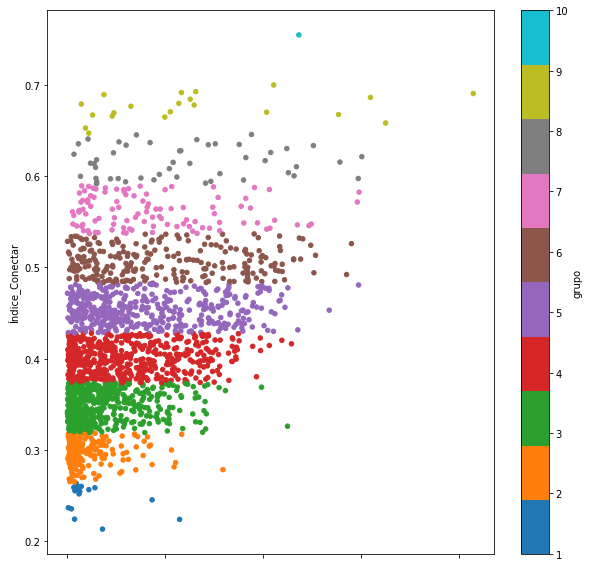

In [27]:
aux_5.plot.scatter('indicadorCS', 'Índice_Conectar', c='grupo', colormap='tab10', figsize=(10, 10));

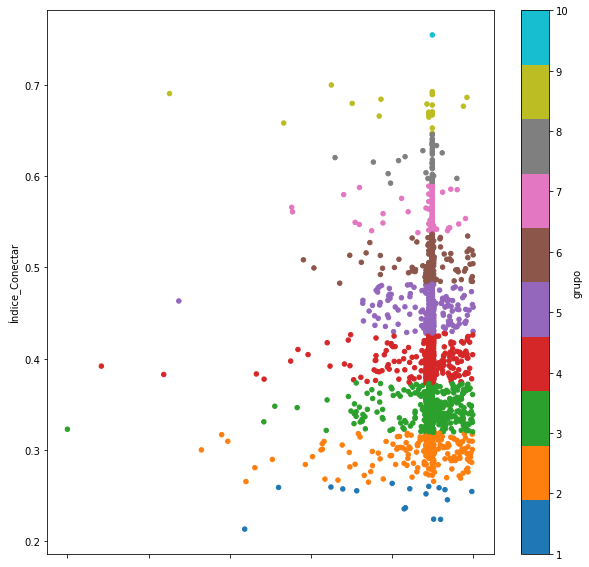

In [28]:
aux_5.plot.scatter('indicadorHOSP', 'Índice_Conectar', c='grupo', colormap='tab10', figsize=(10, 10));

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from   sklearn.linear_model import LinearRegression
from   sklearn.metrics import r2_score
import statsmodels.api as sm

In [20]:
X = aux_5['indicadorRC']
y = aux_5['Índice_Conectar']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:        Índice_Conectar   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                 1.807e+04
Date:                Wed, 27 Oct 2021   Prob (F-statistic):               0.00
Time:                        11:34:42   Log-Likelihood:                 4672.4
No. Observations:                2137   AIC:                            -9341.
Df Residuals:                    2135   BIC:                            -9329.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1934      0.002    111.809      

In [21]:
aux_5.columns

Index(['UF', 'COD. UF', 'COD. MUNIC', 'COD', 'COD 6', 'NOME DO MUNICÍPIO',
       'pop_2020', 'razão_amb-pop', 'indicadorPA', 'cobertura_2020',
       'indicadorCS', 'razão_hosp-pop', 'razão-inv_hosp-pop', 'indicadorHOSP',
       'rc-pc_media', 'RCpcm', 'indicadorRC', 'Índice_Conectar', 'grupo'],
      dtype='object')

In [22]:
Xs = aux_5[['indicadorPA', 'indicadorCS', 'indicadorHOSP', 'indicadorRC']]
y = aux_5['Índice_Conectar']


reg = LinearRegression()
reg.fit(Xs, y)


#print("O modleo é: Vendas = {:.5} + {:.5}*TV + {:.5}*radio + {:.5}*newspaper".format(reg.intercept_[0], reg.coef_[0][0], reg.coef_[0][1], reg.coef_[0][2]))

LinearRegression()

In [23]:
print(reg.intercept_)
print(reg.coef_)

1.0193486799481288e-05
[0.14999824 0.19999265 0.14998855 0.50000145]


In [24]:
X = np.column_stack((aux_5['indicadorRC'], aux_5['indicadorHOSP'], aux_5['indicadorCS'], aux_5['indicadorPA']))
y = aux_5['Índice_Conectar']


X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:        Índice_Conectar   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.354e+09
Date:                Wed, 27 Oct 2021   Prob (F-statistic):               0.00
Time:                        11:34:43   Log-Likelihood:                 19277.
No. Observations:                2137   AIC:                        -3.854e+04
Df Residuals:                    2132   BIC:                        -3.852e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.019e-05   8.34e-06      1.222      0.2